# Exercizes on clustering

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    

def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

file_path="/content/drive/MyDrive/Colab Notebooks/"
#file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

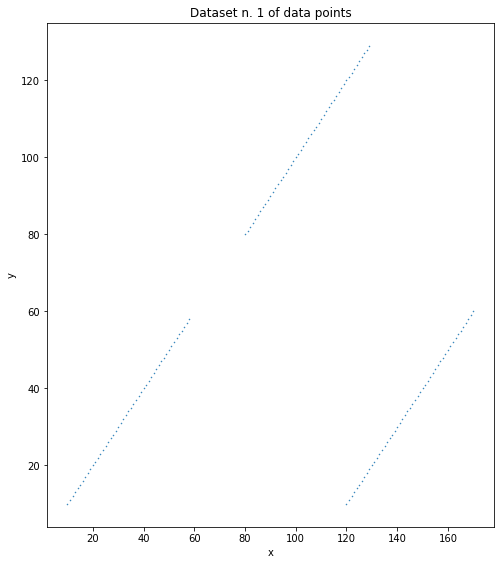

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show() #nel primo dataset sono presenti 3 clusters

The following is the program for plotting the dataset n.2

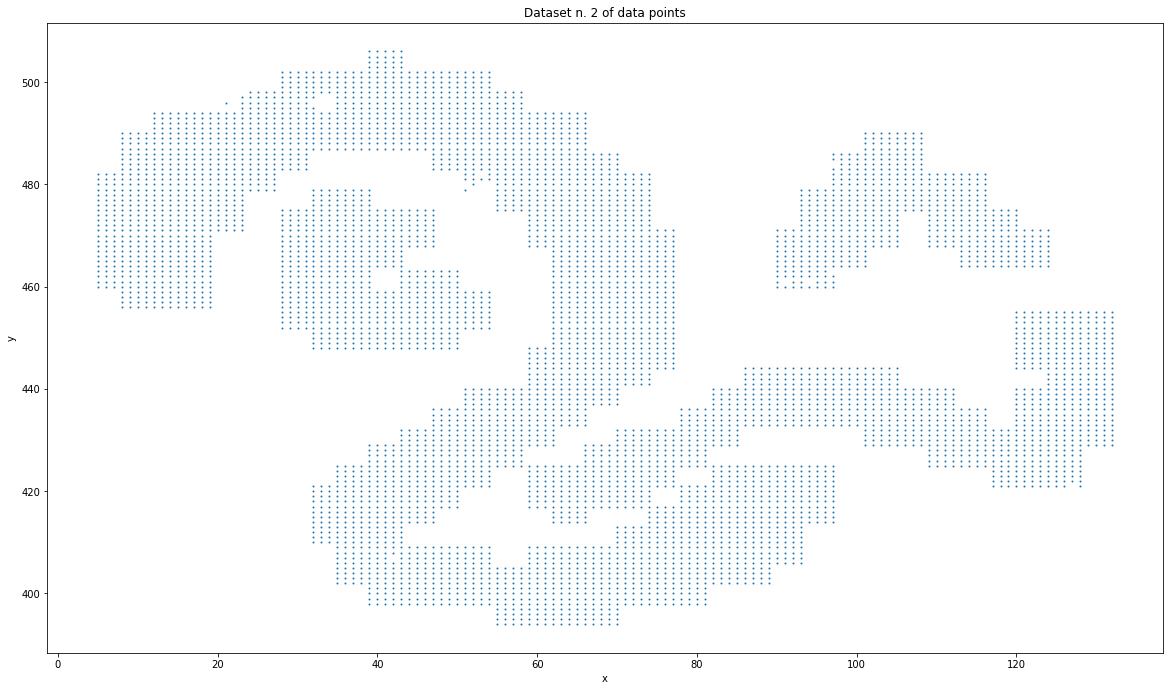

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()#4 clusters

The following is the program for plotting the dataset n.3

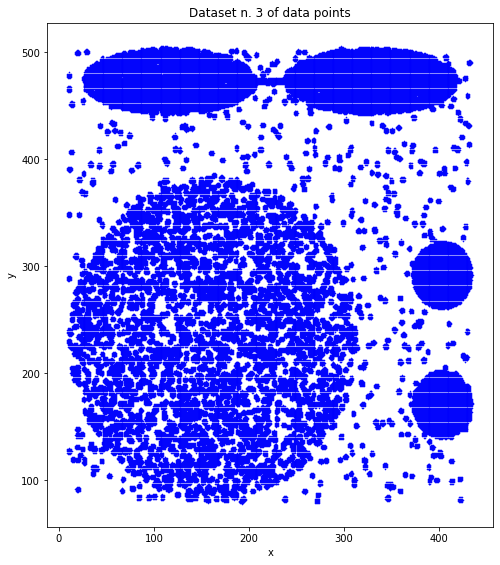

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show() #5 cluster, gli altri sono esempi rumorosi

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="/content/drive/MyDrive/Colab Notebooks/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

#carico i dati e tutte le info necessarie:
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

#eseguo l'algoritmo
k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

#stampo per ogni esempio (con le proprie coordinate) in quale cluster è stato posizionato
i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

In the following program we plot the clusters

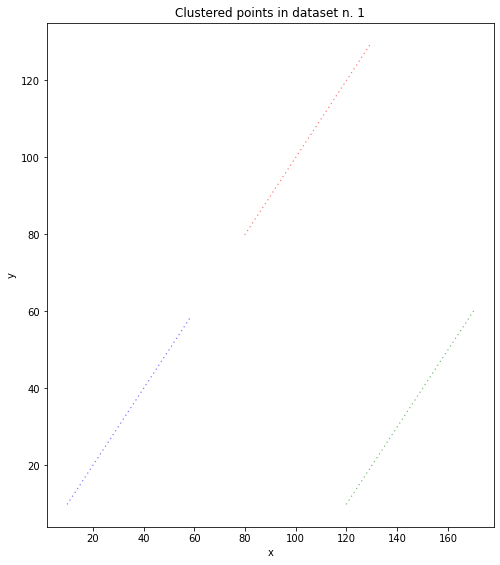

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blue,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

n_samples=
6118


"\n#Riduco la scala delle features:################################################\nfrom sklearn import preprocessing\n\n#data1_SC = preprocessing.StandardScaler().fit_transform(data1) #ogni feature media=0 e dev_std=1\ndata1_MinMax = preprocessing.MinMaxScaler().fit_transform(data1) #ogni feature in [0,1]\n\nnp.random.seed(5)\n#eseguo l'algoritmo k-means\nk=4\nkmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1_MinMax)\n\nfig = plt.figure(figsize=(8,8))\nax = fig.add_subplot(111)\nfig.subplots_adjust(top=1)\nax.set_title('Clustered points in dataset n. 2')\n\nax.set_xlabel('x')\nax.set_ylabel('y')\n\n# set the list of colors to be selected when plotting the different clusters\ncolor=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...\n    \n#plot the dataset\nfor clu in range(k):\n    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.\n    # collect the sequence of 

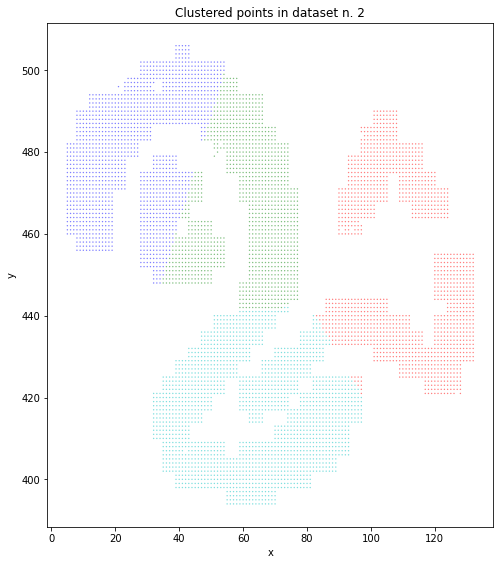

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
# all the three datasets contain data points on (x,y) 
file_name1="dataset-DBSCAN.csv"


#carico i dati e tutte le info necessarie:
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

#eseguo l'algoritmo k-means
k=4
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

#stampo per ogni esempio (con le proprie coordinate) in quale cluster è stato posizionato
#i=0
#for i in range(n_samples1):
#    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
#    print("in cluster n."+str(kmeans1.labels_[i]))


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore

'''
#Riduco la scala delle features:################################################
from sklearn import preprocessing

#data1_SC = preprocessing.StandardScaler().fit_transform(data1) #ogni feature media=0 e dev_std=1
data1_MinMax = preprocessing.MinMaxScaler().fit_transform(data1) #ogni feature in [0,1]

np.random.seed(5)
#eseguo l'algoritmo k-means
k=4
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1_MinMax)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1_MinMax[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1_MinMax[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore
#################################################################################
'''

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

In [ ]:
#Il k-means non riesce ad individuare correttamente tutti e 4 i clusters poichè di natura cerca di individuare clusters a forma globulare. Inoltre è molto sensibile alla scala delle features,
#quindi per cercare di permettere al k-means di apprendere clusters verticali conviene fare pre-processing ed eseguire lo scaling delle features. 
#Purtroppo in questo caso anche dopo lo scaling il k-means non riesce comunque ad indentificare correttamente tutti i clusters a causa della loro forma molto complessa. 

In the following cell I propose you to perform clustering with K-means on the dataset3.

n_samples=
86558


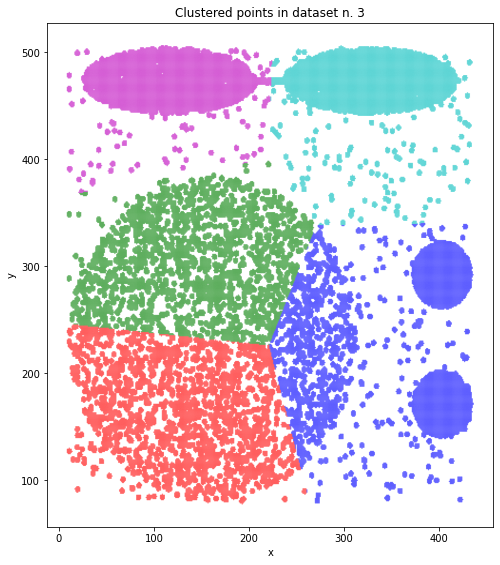

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
# all the three datasets contain data points on (x,y) 
file_name1="CURE-complete.csv"


#carico i dati e tutte le info necessarie:
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

#eseguo l'algoritmo k-means
k=5
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

#stampo per ogni esempio (con le proprie coordinate) in quale cluster è stato posizionato
#i=0
#for i in range(n_samples1):
#    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
#    print("in cluster n."+str(kmeans1.labels_[i]))


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

In [ ]:
#Le divisioni dello spazio fatte dal k-means sono dei poligoni di Voronoi, non riesce ad individuare correttamente tutti i clusters.

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [4]:
import csv
import sys
from os.path import join
from sklearn.cluster import KMeans
import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
# all the three datasets contain data points on (x,y) 
#file_name1="dataset-DBSCAN.csv"

file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"

file_names = [file_name1, file_name2, file_name3]

for file in file_names:

  #carico i dati e tutte le info necessarie:
  data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file)
  #np.random.seed(5)
  #eseguo l'algoritmo k-means per 10 volte
  if(file == file_name1):k = 3
  elif(file == file_name2):k = 4
  else: k = 5
  
  K_means_dieci_volte = []

  for i in range(0, 10):
    kmeans1 = KMeans(n_clusters=k).fit(data1)
    K_means_dieci_volte.append(kmeans1)

  indice_clustering_migliore = 0
  global WSSE_migliore 
  global centroidi_migliori
  var = True
  cluster_migliore = 0
  cont = 0

  #Calcolo i valori della WSSE per ogni esecuzione del k-means (alla fine prendo quella più bassa)
  for i in K_means_dieci_volte:
    
    if(var):
      WSSE_corrente = i.inertia_
      WSSE_migliore = WSSE_corrente
      centroidi_clustering_corrente = i.cluster_centers_
      centroidi_migliori = centroidi_clustering_corrente
      cluster_migliore = 0

      print(centroidi_clustering_corrente)
      print(WSSE_corrente)
      print("")
      var = False
      
    else:
      centroidi_clustering_corrente = i.cluster_centers_
      WSSE_corrente = i.inertia_

      print(centroidi_clustering_corrente)
      print(WSSE_corrente)
      print("")

      if(WSSE_corrente < WSSE_migliore):
        WSSE_migliore = WSSE_corrente
        indice_clustering_migliore = i
        centroidi_migliori = centroidi_clustering_corrente
        cluster_migliore = cont

    cont+=1


  #stampo la soluzione di clustering migliore:
  print("Nome file: ", file)
  print("")
  print("Centroidi Clustering migliore: ", centroidi_migliori)
  print("")
  print("WSSE migliore: ", WSSE_migliore)
  print("")
  print("Clustering migliore: ", cluster_migliore+1)
  print("")
  print("")

  

n_samples=
150
[[ 34.   34. ]
 [104.5 104.5]
 [145.   35. ]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

[[104.5 104.5]
 [ 34.   34. ]
 [145.   35. ]]
62525.0

[[104.5 104.5]
 [145.   35. ]
 [ 34.   34. ]]
62525.0

[[104.5 104.5]
 [ 34.   34. ]
 [145.   35. ]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

[[ 34.   34. ]
 [145.   35. ]
 [104.5 104.5]]
62525.0

Nome file:  3-clusters.csv

Centroidi Clustering migliore:  [[ 34.   34. ]
 [104.5 104.5]
 [145.   35. ]]

WSSE migliore:  62525.0

Clustering migliore:  1


n_samples=
6118
[[110.21565934 451.87912088]
 [ 60.71867421 467.10509297]
 [ 63.82205128 416.6       ]
 [ 26.71932203 479.07186441]]
2586239.3238045215

[[ 26.15443746 479.10132774]
 [110.24828061 451.90233838]
 [ 63.85043389 416.71056662]
 [ 60.15384615 467.62166405]]
2586364

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

n_samples=
150
20


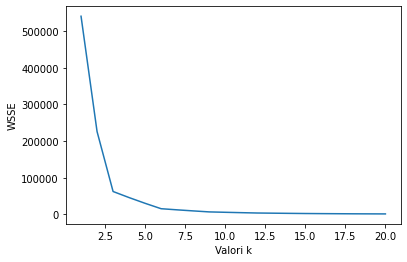

n_samples=
6118
20


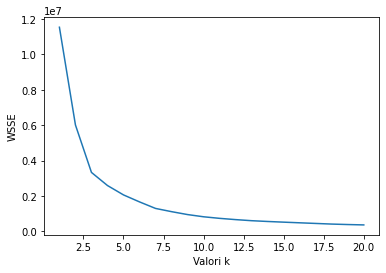

n_samples=
86558
20


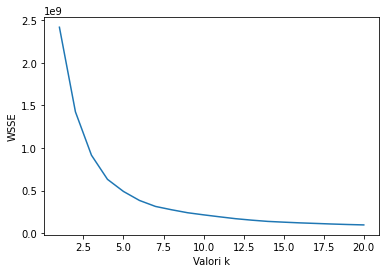

In [ ]:
import csv
import sys
from os.path import join
from sklearn.cluster import KMeans
import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
# all the three datasets contain data points on (x,y) 
#file_name1="dataset-DBSCAN.csv"

file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"

file_names = [file_name1, file_name2, file_name3]

WSSE_migliori_per_diversi_k_file1 = [] #è il vettore che per ogni valore di k conterrà la migliore misura di WSSE sul primo dataset
valore_kfile1 = [] #è il vettore che per ogni valore di k conterrà l'indice del vettore WSSE_migliori_per_diversi_k_(file1) che contiene il valore massimo

WSSE_migliori_per_diversi_k_file2 = []
valore_kfile2 = []

WSSE_migliori_per_diversi_k_file3 = []
valore_kfile3 = []

k_max = 20

for file in file_names:

  #carico i dati e tutte le info necessarie:
  data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file)
  #np.random.seed(5)
  #eseguo l'algoritmo k-means per 10 volte
  #k=4
  K_means_dieci_volte = []
  
  for k in range (1, k_max+1): #per trovare la WSSE migliore su ogni dataset eseguo il k-means 10 volte e poi prendo la WSSE più piccola.

    for i in range(0, 10):
      kmeans1 = KMeans(n_clusters=k).fit(data1)
      K_means_dieci_volte.append(kmeans1)

    indice_clustering_migliore = 0
    global WSSE_migliore 
    global centroidi_migliori
    var = True
    cluster_migliore = 0
    cont = 0

    #Calcolo i valori della WSSE per ogni esecuzione del k-means (alla fine prendo quella più bassa)
    for i in K_means_dieci_volte:
      
      if(var):
        WSSE_corrente = i.inertia_
        WSSE_migliore = WSSE_corrente
        centroidi_clustering_corrente = i.cluster_centers_
        centroidi_migliori = centroidi_clustering_corrente
        cluster_migliore = 0

        #print(centroidi_clustering_corrente)
        #print(WSSE_corrente)
        #print("")
        var = False
        
      else:
        centroidi_clustering_corrente = i.cluster_centers_
        WSSE_corrente = i.inertia_

        #print(centroidi_clustering_corrente)
        #print(WSSE_corrente)
        #print("")

        if(WSSE_corrente < WSSE_migliore):
          WSSE_migliore = WSSE_corrente
          indice_clustering_migliore = i
          centroidi_migliori = centroidi_clustering_corrente
          cluster_migliore = cont

      cont+=1

    '''
    #stampo la soluzione di clustering migliore:
    print("Nome file: ", file)
    print("")
    #print("Centroidi Clustering migliore: ", centroidi_migliori)
    print("")
    print("WSSE migliore, valore di k): ", WSSE_migliore, k)
    print("")
    print("Clustering migliore, valore di k: ", cluster_migliore+1, k)
    print("")
    print("")
    '''

    if file == file_name1:
      WSSE_migliori_per_diversi_k_file1.append(WSSE_migliore)
      valore_kfile_1 = k #valore di k corrente 
    
    elif file == file_name2:
      WSSE_migliori_per_diversi_k_file2.append(WSSE_migliore)
      valore_kfile_2 = k

    else:
      WSSE_migliori_per_diversi_k_file3.append(WSSE_migliore)
      valore_kfile_3 = k


  import matplotlib.pyplot as plt
  import matplotlib.ticker as ticker


  print(len(WSSE_migliori_per_diversi_k_file1))

  if file == file_name1:
    plt.plot(np.arange(1, k_max+1), WSSE_migliori_per_diversi_k_file1)
    plt.xlabel("Valori k")
    plt.ylabel("WSSE")
    plt.show()

  elif file == file_name2:
    plt.plot(np.arange(1, k_max+1),WSSE_migliori_per_diversi_k_file2)
    plt.xlabel("Valori k")
    plt.ylabel("WSSE")
    plt.show()

  else: 
    plt.plot(np.arange(1, k_max+1),WSSE_migliori_per_diversi_k_file3)
    plt.xlabel("Valori k")
    plt.ylabel("WSSE")
    plt.show()





In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

n_samples=
6118
Numero di clusters individuati:  1


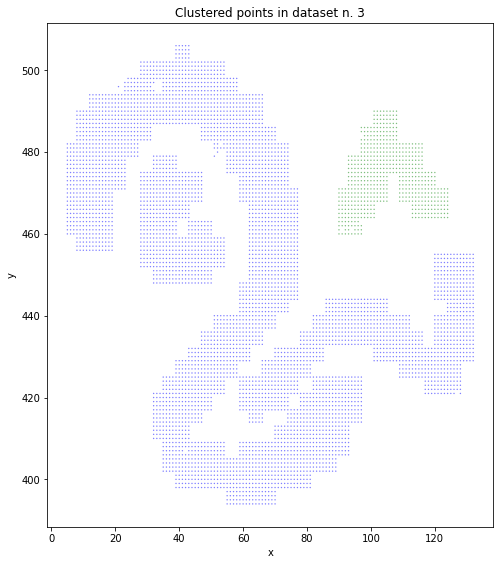

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import csv
import sys
from os.path import join
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
file_name2="dataset-DBSCAN.csv"     
#file_name3="CURE-complete.csv"


#carico i dati e tutte le info necessarie:
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name2)
#data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name3)

dbscan = DBSCAN(eps=5,min_samples=10)

clustering = dbscan.fit(data1)
clusters = clustering.labels_
print("Numero di clusters individuati: ", len(set(clusters))-1) #-1 perchè un cluster rappresente i noise points
k = len(set(clusters))


#Plot 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if clustering.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if clustering.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore


#color = {-1: "red", 0:"blu", 1:"green", 2:"skyblue"}
#fig, ax = plt.subplot(figsize=(8,8))
#grouped = 




In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

n_samples=
6118
Numero di vicini considerati: 10
Dimensione della matrice di distanza: (6118, 10)

Valori di distanza dell'esempio 0 dai suoi 10 vicini: [0.0, 1.0, 1.0, 1.41, 2.0, 2.0, 2.24, 2.24, 2.83, 3.0]
Valori di distanza dell'esempio 1 dai suoi 10 vicini: [0.0, 1.0, 1.0, 1.0, 1.41, 1.41, 2.0, 2.0, 2.24, 2.24]
Valori di distanza dell'esempio 2 dai suoi 10 vicini: [0.0, 1.0, 1.0, 1.0, 1.41, 1.41, 2.0, 2.0, 2.0, 2.24]
Valori di distanza dell'esempio 3 dai suoi 10 vicini: [0.0, 1.0, 1.0, 1.0, 1.41, 1.41, 2.0, 2.0, 2.0, 2.24]
Valori di distanza dell'esempio 4 dai suoi 10 vicini: [0.0, 1.0, 1.0, 1.0, 1.41, 1.41, 2.0, 2.0, 2.0, 2.24]


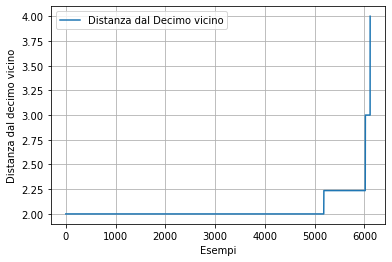

Numero di clusters individuati:  2


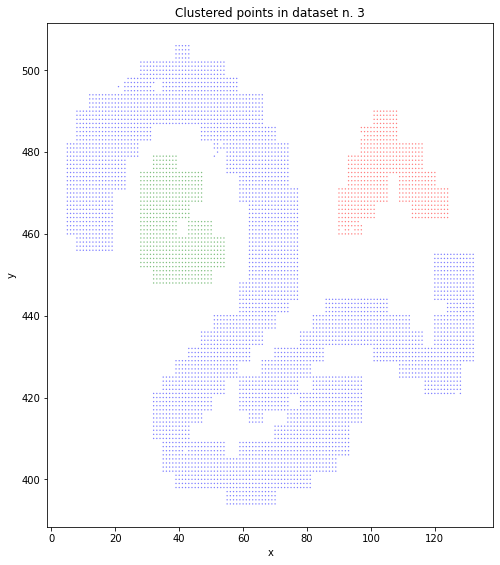

In [ ]:
from os.path import join
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import csv
import sys
from os.path import join
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors



def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) #(prima riga del csv) conterrà sia il numero di esempi che il numero di features
       n_samples = int(temp1[0]) #memorizzo il numero di esempi
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1]) #memorizzo il numero delle features
       temp2 = next(data_file) #(seconda riga del csv) conterrà i nomi delle features
       feature_names = np.array(temp2[:n_features]) #in features_names memorizzo i nomi delle features

       data_list = [iter for iter in data_file] #memorizzo in data_list tutti gli esempi del dataset
               
       data = np.asarray(data_list, dtype=np.float64) #data sarà la matrice che conterrà tutti gli esempi                 
       
   return(data,feature_names,n_samples,n_features)


file_path="/content/drive/MyDrive/Colab Notebooks/"
file_name2="dataset-DBSCAN.csv"  

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name2)

k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(data1)
distances, indices = nbrs.kneighbors(data1)

print("Numero di vicini considerati: " + str(k))
print("Dimensione della matrice di distanza: " + str(distances.shape) + "\n")

#stampo i primi 5 esempi
for enum, row in enumerate(distances[:5]):
  print("Valori di distanza dell'esempio " + str(enum) + " dai suoi 10 vicini: " + str([round(x, 2) for x in row])) #(considero solo due cifre dopo la virgola)
  #print("Valori di distanza dell'esempio " + str(enum) + " dai suoi 10 vicini: " + str(row))

#converto la matrice dei dati in un dataframe:
data1_dataframe = pd.DataFrame(data1, columns=['x','y'])  
data1_dataframe['Distanza dal Decimo vicino'] = distances[:,-1] #prendo l'ultimo valore di distanza perchè è proprio quella che mi serve.
data1_dataframe.head()

data1_dataframe.sort_values('Distanza dal Decimo vicino').reset_index()[["Distanza dal Decimo vicino"]].plot()

plt.xlabel("Esempi")
plt.ylabel("Distanza dal decimo vicino")
plt.grid(True)
plt.show()



dbscan = DBSCAN(eps=2.25, min_samples=10)

clustering = dbscan.fit(data1)
clusters = clustering.labels_
print("Numero di clusters individuati: ", len(set(clusters))-1) #-1 perchè un cluster rappresente i noise points
k = len(set(clusters))


#Plot 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w'] #al primo cluster verrà assegnato il colore blu,...
    
#plot the dataset
for clu in range(k):
    #Per ogni cluster memorizzo gli esempi che sono stati inseriti al suo interno memorizzando i valori delle features di ogni esempio.
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if clustering.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if clustering.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5) #per ogni cluster stampo i suoi esempi con un certo colore





